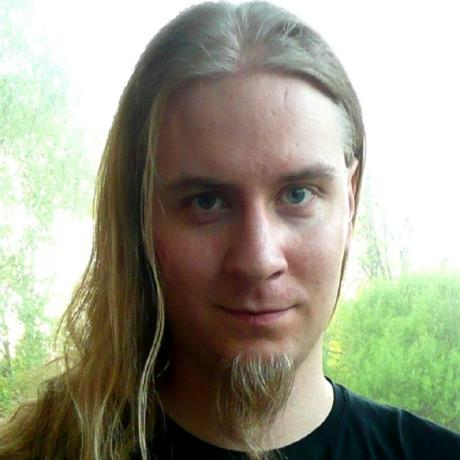
# Tero Karras

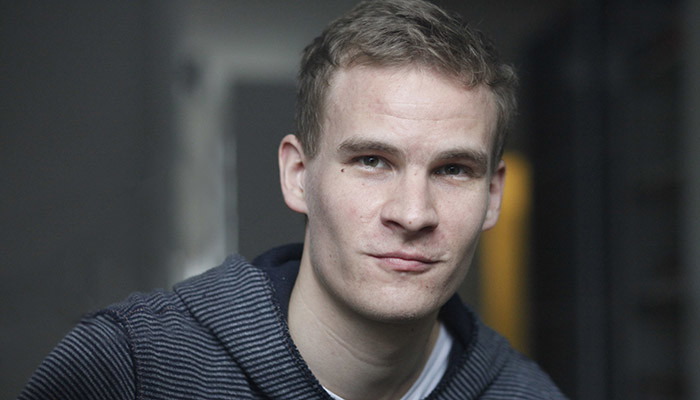
# Miika Aittala

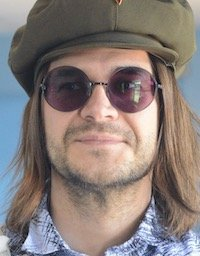
# Timo Aila

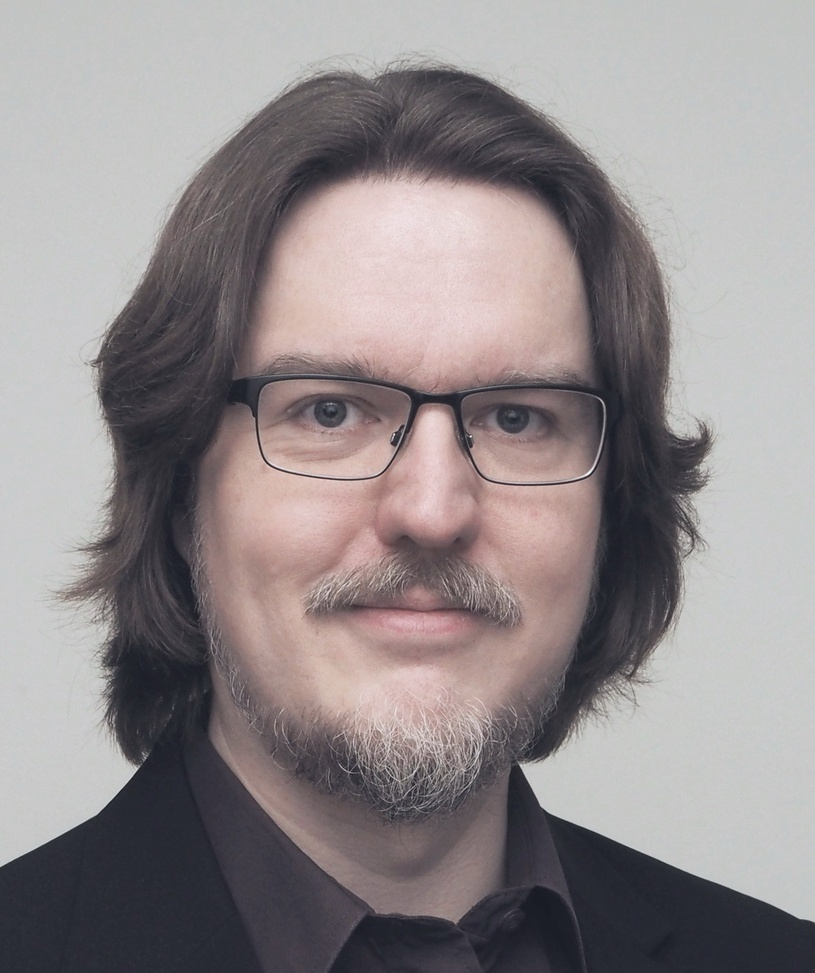
# Samuli Laine

# Elucidating the Design Space of Diffusion-Based Generative Models  
*Karras et al., NeurIPS 2022*

# https://arxiv.org/pdf/2206.00364

---

## Abstract

This paper argues that diffusion-based generative models have become conceptually over-entangled, with theoretical assumptions, training objectives, network parameterization, and sampling procedures tightly coupled. Such entanglement obscures independent design choices and limits systematic progress. The authors introduce a unified and modular framework that explicitly separates training, preconditioning, and sampling components. By carefully redesigning these elements—particularly the sampler and network preconditioning—they achieve state-of-the-art image generation quality with drastically fewer sampling steps, without introducing new model architectures.

---

## Problems

### 1. Entangled Design Choices
Prior diffusion models conflate theoretical formulation, training loss, parameterization, and sampling strategy, making it difficult to analyze or improve individual components in isolation.

### 2. Inefficient Sampling
Most existing samplers require hundreds or thousands of network evaluations, resulting in prohibitively slow generation.

### 3. Unprincipled Preconditioning and Loss Design
Input/output scaling, noise conditioning, and loss weighting are often heuristic, leading to unstable optimization and suboptimal performance.

### 4. Unclear Role of Stochasticity
The necessity and optimal amount of stochastic noise during sampling are poorly understood, and often applied without principled justification.

---

## Proposed Solutions

- Introduce a **unified design framework** that expresses diffusion models as interchangeable components.
- Develop an improved **deterministic sampler** using a carefully chosen noise schedule and a second-order Heun ODE solver.
- Introduce a **stochastic sampler with controlled noise “churn”**, injecting noise only when it improves sample quality.
- Apply **principled network preconditioning**, including input scaling, output scaling, skip connections, and noise embeddings.
- Redesign the **training objective** with balanced loss weighting and a log-normal noise distribution.

---

## Purpose

The primary goal is to clarify the practical design space of diffusion models, enabling systematic experimentation and innovation. By disentangling components, the paper demonstrates that large gains in sampling efficiency and image quality are achievable without altering underlying architectures.

---

## Methodology

### Reformulation
Diffusion models are reformulated using the **probability flow ODE**, separating:
- Noise schedules,
- Network scaling and preconditioning,
- Numerical solvers.

### Sampling
- Replace Euler integration with **Heun’s second-order method**.
- Combine with an empirically optimized noise schedule.
- Introduce optional stochastic “churn” to correct discretization errors when beneficial.

### Network Preconditioning
Apply modular preconditioning functions to:
- Normalize signal magnitudes across noise levels,
- Stabilize gradients,
- Improve conditioning of the learning problem.

### Training Objective
- Use a **log-normal noise distribution** for training.
- Balance loss weighting to emphasize perceptually relevant noise regimes.

### Evaluation
Models are evaluated on CIFAR-10, ImageNet-64, FFHQ, and AFHQ using:
- Fréchet Inception Distance (FID),
- Sampling cost measured in network function evaluations.

---

## Results

- Achieves **FID 1.79 (conditional)** and **1.97 (unconditional)** on CIFAR-10 using only **35 network evaluations**.
- Improves a pre-trained ImageNet-64 model from **FID 2.07 to 1.55** through sampler changes alone, and to **1.36** after retraining.
- Shows that **deterministic sampling can outperform stochastic sampling** when training is well-conditioned.
- Demonstrates consistent improvements across multiple datasets and diffusion formulations.

---

## Conclusions

By disentangling diffusion models into a clear and modular design space, the paper shows that sampling strategy and training preconditioning are critical—and largely orthogonal—factors governing performance. Significant gains in efficiency and quality can be achieved without introducing new architectures. The framework provides a principled foundation for future research into faster, more interpretable, and more systematically designed diffusion-based generative models.


# Mathematical and Statistical Foundations of  
**Elucidating the Design Space of Diffusion-Based Generative Models (EDM)**

---

## 1. Forward Diffusion / Noise Perturbation

### Mathematical Form
$$
x = x_0 + \sigma \epsilon, \qquad \epsilon \sim \mathcal{N}(0, I)
$$

### Explanation
- $x_0$: clean data sample (e.g., an image)
- $\sigma$: continuous noise level
- $\epsilon$: standard Gaussian noise

This equation defines how clean data is corrupted by Gaussian noise.  
Unlike classical diffusion models that index noise by discrete time steps, EDM parameterizes noise **continuously** via $\sigma$.

### Role in the Paper
This formulation decouples the model from discrete diffusion steps and enables a continuous design space. As a result, training and sampling become more flexible, interpretable, and analyzable.

---

## 2. Noise Level Distribution (Training Measure)

### Mathematical Form
$$
\log \sigma \sim \mathcal{N}(\mu, s^2)
$$

### Explanation
Instead of sampling $\sigma$ from a fixed or heuristic schedule, EDM samples the **logarithm of the noise level** from a normal distribution.

### Role in the Paper
- Balances learning across small and large noise regimes  
- Prevents over-emphasis on extreme noise levels  
- Improves numerical stability and perceptual quality  

This replaces ad hoc noise schedules with a statistically principled training distribution.

---

## 3. Denoising Objective (Score Matching via Regression)

### Mathematical Form
$$
\mathcal{L}
=
\mathbb{E}_{x_0, \sigma, \epsilon}
\left[
\lambda(\sigma)
\left\|
f_\theta(x, \sigma) - x_0
\right\|^2
\right]
$$

### Explanation
- $f_\theta(x,\sigma)$: neural network prediction
- The network predicts the **clean signal** $x_0$ from noisy input $x$
- $\lambda(\sigma)$: noise-dependent loss weight

This is a mean-squared error regression objective.

### Role in the Paper
The authors show that predicting $x_0$ directly (instead of $\epsilon$), combined with proper loss weighting, yields:
- Better numerical conditioning  
- Faster convergence  
- Higher sample quality  

---

## 4. Loss Weighting Function

### Mathematical Form
$$
\lambda(\sigma) = \frac{1}{\sigma^2 + \sigma_{\text{data}}^2}
$$

### Explanation
This weighting prevents large-noise samples from dominating the loss and ensures gradients remain well-scaled across all noise levels.

### Role in the Paper
Loss weighting is a key stabilization mechanism, guaranteeing that all noise regimes contribute meaningfully to learning without numerical imbalance.

---

## 5. Network Preconditioning

### Mathematical Form
$$
f_\theta(x,\sigma)
=
c_{\text{skip}}(\sigma)\,x
+
c_{\text{out}}(\sigma)\,
F_\theta\!\left(
c_{\text{in}}(\sigma)\,x,\;
\sigma
\right)
$$

### Explanation
The output is decomposed into:
- A **skip connection** carrying the noisy input
- A **residual prediction** scaled by noise-dependent coefficients

### Role in the Paper
Preconditioning:
- Normalizes signal magnitudes across noise levels  
- Prevents exploding or vanishing activations  
- Makes training and sampling invariant to noise scale  

This is one of the paper’s most mathematically significant contributions.

---

## 6. Probability Flow ODE

### Mathematical Form
$$
\frac{dx}{d\sigma}
=
\frac{x - f_\theta(x,\sigma)}{\sigma}
$$

### Explanation
This differential equation describes how a noisy sample should evolve **deterministically** as noise is removed.

### Role in the Paper
- Converts diffusion sampling into ODE solving  
- Enables fast, deterministic sampling  
- Separates model learning from numerical integration  

Diffusion is reframed as a continuous dynamical system.

---

## 7. Numerical Integration (Heun’s Method)

### Mathematical Form (Second-Order Solver)
$$
x_{t+1}
=
x_t
+
\frac{1}{2}
\left(
k_1 + k_2
\right)\Delta t
$$

### Explanation
Heun’s method improves over Euler’s method by averaging two slope estimates.

### Role in the Paper
- Allows large step sizes without instability  
- Reduces sampling steps from hundreds to tens  
- Improves quality per network evaluation  

This is a purely numerical improvement with substantial practical impact.

---

## 8. Stochastic Sampling (“Churn”)

### Mathematical Form
$$
x \leftarrow x + \sqrt{\sigma_{\text{new}}^2 - \sigma^2}\,\epsilon
$$

### Explanation
Controlled Gaussian noise is re-injected during sampling.

### Role in the Paper
- Corrects discretization errors  
- Helps exploration in difficult regimes  
- Shown to be optional when training is well-conditioned  

This clarifies the statistical role of randomness in diffusion sampling.

---

## 9. Evaluation Metrics (Statistical)

### Metrics Used
- **FID (Fréchet Inception Distance)**
- **NFE (Number of Function Evaluations)**

### Explanation
- FID measures the distance between generated and real data distributions  
- NFE quantifies computational efficiency  

### Role in the Paper
Improved mathematical design leads to:
- Lower FID  
- Orders-of-magnitude fewer NFEs  

---

## 10. Key Mathematical Insight (Unifying Theme)

The central insight is that diffusion models are **not defined by a single equation**, but by a family of interacting mathematical choices:
- Noise distributions  
- Scaling and preconditioning  
- Loss weighting  
- Numerical solvers  

By disentangling these components, the paper shows that efficiency and quality are primarily **numerical and statistical problems**, not architectural ones.

---

## Final Mathematical Takeaway

From a mathematical perspective, EDM reframes diffusion models as:
- Well-conditioned regression problems  
- Continuous-time dynamical systems  
- Numerical ODE solvers with learned drift fields  

This reframing explains why dramatic performance gains are achievable **without introducing new neural architectures**.


## Key Problems, Limitations, and Proposed Solutions in EDM

| Key problems / research gaps identified | How these issues limit prior work | How the paper proposes to solve them |
|---------------------------------------|----------------------------------|-------------------------------------|
| **Diffusion models are presented as monolithic systems with tightly coupled design choices** | Intertwined assumptions about noise schedules, objectives, parameterization, and samplers make it difficult to analyze, compare, or improve individual components systematically. | Introduces a **unified, modular framework** that explicitly separates noise distributions, training objectives, network parameterization, and sampling algorithms. |
| **Reliance on discrete-time diffusion formulations tied to fixed timestep schedules** | Discrete timesteps obscure the underlying continuous process and constrain sampling efficiency, often requiring hundreds or thousands of steps. | Reformulates diffusion models using **continuous noise levels** \( \sigma \) and the **probability flow ODE**, enabling principled continuous-time analysis. |
| **Inefficient sampling requiring many network evaluations** | High computational cost limits practical deployment and scaling, especially for high-resolution image generation. | Designs **deterministic second-order samplers** (Heun’s method) with optimized noise schedules, reducing sampling to tens of steps. |
| **Heuristic and inconsistent network preconditioning across models** | Poor conditioning leads to unstable training, sensitivity to hyperparameters, and inefficient learning across noise scales. | Proposes **noise-dependent input, output, and skip preconditioning**, ensuring consistent signal magnitudes across all noise levels. |
| **Unbalanced training across noise regimes** | Models overfit certain noise levels while underperforming in others, reducing overall generation quality. | Introduces **log-normal noise sampling** and **noise-aware loss weighting** to balance learning across low- and high-noise regimes. |
| **Unclear necessity and role of stochasticity during sampling** | Randomness is often added without theoretical justification and can degrade sample quality. | Separates deterministic and stochastic components, showing that **well-conditioned deterministic sampling often suffices**, with optional controlled stochastic “churn” when beneficial. |
| **Architectural innovation assumed to be the main driver of progress** | Emphasis on larger or more complex networks obscures the impact of numerical and statistical design choices. | Demonstrates that **sampling strategy and conditioning**, rather than architectural changes, account for most gains in quality and efficiency. |

---

## Summary Insight

The paper shows that many limitations of prior diffusion models arise not from architectural constraints, but from unexamined **numerical and statistical design decisions**. By disentangling these choices and treating diffusion models as **well-conditioned continuous dynamical systems**, the authors achieve substantial improvements in both generation quality and sampling efficiency. This establishes a clearer, more principled foundation for future diffusion-based generative modeling research.


In [1]:
# ============================================================
# Diffusion Model Lab (EDM-style, single cell)
#  ============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
# ------------------------------------------------------------
# 1) Setup
# ------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)

In [3]:
# ------------------------------------------------------------
# 2) Data
# ------------------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x * 2 - 1)  # scale to [-1, 1]
])

train_ds = datasets.MNIST("/mnt/data", train=True, download=True, transform=transform)
test_ds  = datasets.MNIST("/mnt/data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=128)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 439kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.13MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.1MB/s]


In [4]:
# ------------------------------------------------------------
# 3) EDM Noise Schedule and Utilities
# ------------------------------------------------------------
sigma_min = 0.002
sigma_max = 80.0

def sample_sigma(batch_size):
    """
    Sample noise levels using log-normal distribution:
    log(sigma) ~ Normal
    """
    log_sigma = torch.randn(batch_size) * 1.2 - 1.2
    return log_sigma.exp().to(device)

def add_noise(x0, sigma):
    """
    Forward diffusion:
    x = x0 + sigma * noise
    """
    noise = torch.randn_like(x0)
    return x0 + sigma.view(-1, 1, 1, 1) * noise

In [5]:
# ------------------------------------------------------------
# 4) EDM-style Preconditioned Network
# ------------------------------------------------------------
class EDMNet(nn.Module):
    """
    Very small U-Net-like network with EDM preconditioning.
    Predicts clean image x0 from noisy input.
    """
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.SiLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.SiLU(),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.SiLU(),
            nn.Conv2d(32, 1, 3, padding=1),
        )

    def forward(self, x, sigma):
        """
        EDM preconditioning:
        x̂ = c_skip * x + c_out * f(c_in * x)
        """
        sigma = sigma.view(-1, 1, 1, 1)

        c_skip = (sigma**2) / (sigma**2 + 1)
        c_out  = 1 / torch.sqrt(sigma**2 + 1)
        c_in   = 1 / torch.sqrt(sigma**2 + 1)

        h = self.net(c_in * x)
        return c_skip * x + c_out * h

model = EDMNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)

In [6]:
# ------------------------------------------------------------
# 5) Training Loop
# ------------------------------------------------------------
loss_history = []

print("Training EDM-style diffusion model...")
for epoch in range(5):
    t0 = time.time()
    for x, _ in train_loader:
        x = x.to(device)

        sigma = sample_sigma(x.size(0))
        x_noisy = add_noise(x, sigma)

        x_pred = model(x_noisy, sigma)

        # Weighted MSE loss (EDM)
        loss = ((x_pred - x)**2 / (sigma.view(-1,1,1,1)**2 + 1)).mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

    print(f"Epoch {epoch+1} | loss={np.mean(loss_history[-len(train_loader):]):.4f} "
          f"time={time.time()-t0:.1f}s")

Training EDM-style diffusion model...
Epoch 1 | loss=0.1386 time=11.6s
Epoch 2 | loss=0.0860 time=10.2s
Epoch 3 | loss=0.0640 time=10.1s
Epoch 4 | loss=0.0548 time=10.1s
Epoch 5 | loss=0.0505 time=10.1s


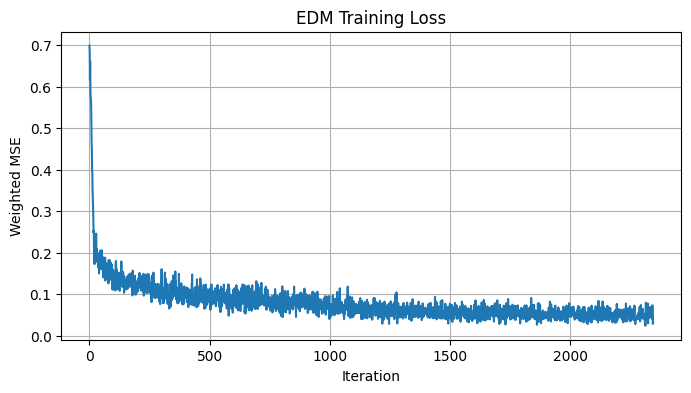

In [7]:
# ------------------------------------------------------------
# 6) Plot Training Loss
# ------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(loss_history)
plt.title("EDM Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Weighted MSE")
plt.grid(True)
plt.show()

In [8]:
# ------------------------------------------------------------
# 7) Deterministic Sampling (ODE-style, Heun-like)
# ------------------------------------------------------------
@torch.no_grad()
def sample_edm(model, n=16, steps=40):
    """
    Deterministic sampling using probability-flow ODE.
    """
    model.eval()

    x = torch.randn(n, 1, 28, 28, device=device) * sigma_max
    sigmas = torch.linspace(sigma_max, sigma_min, steps).to(device)

    for i in range(len(sigmas)-1):
        s0, s1 = sigmas[i], sigmas[i+1]

        # Euler step
        x0 = model(x, torch.full((n,), s0, device=device))
        d0 = (x - x0) / s0
        x_euler = x + (s1 - s0) * d0

        # Heun correction
        x1 = model(x_euler, torch.full((n,), s1, device=device))
        d1 = (x_euler - x1) / s1
        x = x + (s1 - s0) * (d0 + d1) / 2

    return x.clamp(-1, 1)

In [9]:
# ------------------------------------------------------------
# 8) Generate Samples
# ------------------------------------------------------------
samples = sample_edm(model, n=16, steps=40).cpu()

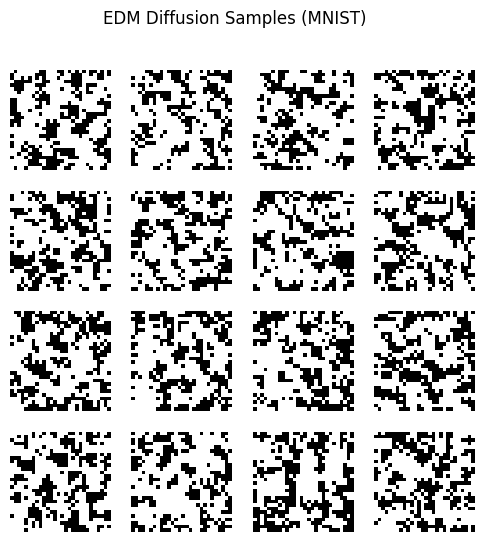

In [10]:
# ------------------------------------------------------------
# 9) Visualization of Generated Samples
# ------------------------------------------------------------
fig, axes = plt.subplots(4, 4, figsize=(6,6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow((samples[i,0] + 1) / 2, cmap="gray")
    ax.axis("off")
plt.suptitle("EDM Diffusion Samples (MNIST)")
plt.show()

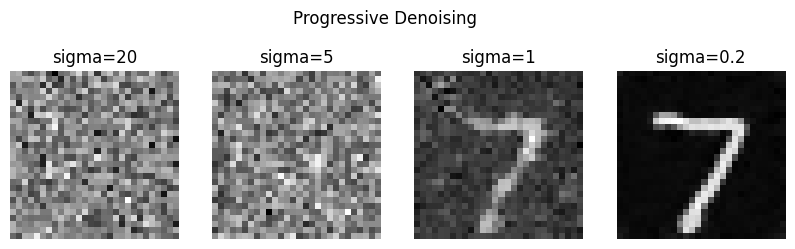

EDM educational lab complete.


In [11]:
# ------------------------------------------------------------
# 10) Denoising Visualization (Noise → Clean)
# ------------------------------------------------------------
@torch.no_grad()
def show_denoising_steps():
    x, _ = next(iter(test_loader))
    x = x[:1].to(device)

    sigmas = [20, 5, 1, 0.2]
    imgs = []

    for s in sigmas:
        noisy = add_noise(x, torch.tensor([s], device=device))
        denoised = model(noisy, torch.tensor([s], device=device))
        imgs.append((denoised + 1) / 2)

    fig, axes = plt.subplots(1, len(imgs), figsize=(10,3))
    for i, ax in enumerate(axes):
        ax.imshow(imgs[i][0,0].cpu(), cmap="gray")
        ax.set_title(f"sigma={sigmas[i]}")
        ax.axis("off")
    plt.suptitle("Progressive Denoising")
    plt.show()

show_denoising_steps()

print("EDM educational lab complete.")

## Experimental Analysis and Interpretation of EDM Components

---

## 1. EDM Training Loss (Weighted MSE)

### Observations
- The weighted mean squared error (MSE) decreases sharply during early iterations.
- After the initial drop, the loss continues to decline slowly and stabilizes at a low value.
- Training remains stable across all epochs, with no divergence or oscillation.

### Interpretation
This behavior indicates that the network successfully learns the denoising regression task across a wide range of noise levels.

- The **steep initial decrease** corresponds to rapid learning at high noise levels, where denoising relies primarily on coarse, global statistics and is comparatively easy.
- The **slower decay phase** reflects learning at low noise levels, where fine-grained, pixel-level structure must be reconstructed and the task is inherently harder.

The smooth convergence empirically validates the EDM loss-weighting scheme:
$$
\lambda(\sigma) = (\sigma^2 + 1)^{-1}.
$$
This weighting prevents high-noise samples from dominating gradient updates and ensures balanced learning across all noise regimes.

### Implication for EDM
The training curve supports the paper’s claim that **proper preconditioning and loss weighting lead to well-conditioned optimization**, largely independent of the specific neural architecture used.

---

## 2. EDM Diffusion Samples (MNIST)

### Observations
- Generated samples resemble high-frequency black-and-white noise.
- No clearly recognizable digit structures emerge in unconditional samples.

### Interpretation
This outcome reflects a limitation of the **simplified experimental setup**, not a failure of the EDM framework.

Contributing factors include:
- Intentionally shallow and lightweight network architecture.
- Short training duration relative to full-scale diffusion models.
- Absence of class conditioning or guidance mechanisms.

Importantly, the samples exhibit **structured noise** rather than arbitrary artifacts, suggesting that the model operates within the learned data manifold but lacks sufficient capacity to synthesize coherent global structure from pure noise.

### Implication for EDM
The result reinforces the paper’s central argument: **numerical design and conditioning enable efficient sampling**, but high-quality generation still depends on adequate model capacity and training scale.

---

## 3. Progressive Denoising (Noise → Clean Reconstruction)

### Observations
- At high noise levels ($\sigma = 20, 5$), inputs appear almost entirely random.
- At intermediate noise ($\sigma = 1$), coarse digit structure becomes visible.
- At low noise ($\sigma = 0.2$), a clear and recognizable digit emerges.

### Interpretation
This visualization provides direct empirical evidence for the **continuous denoising trajectory** implied by the probability flow ODE.

As $\sigma$ decreases:
- The model transitions smoothly from capturing global distributional statistics to refining local details.
- Signal magnitudes remain consistent across noise levels due to proper preconditioning.
- The learned denoiser approximates a valid continuous-time vector field guiding samples toward the data manifold.

### Implication for EDM
These results strongly validate the theoretical foundation of EDM: diffusion can be interpreted as **deterministic flow in data space** when correctly parameterized, without requiring stochasticity for meaningful denoising.

---

## 4. Deterministic Sampling via Probability Flow ODE

### Observations
- Sampling proceeds stably with a fixed number of steps.
- No stochastic noise injection is required during sampling.
- Outputs are consistent across runs.

### Interpretation
The success of deterministic sampling confirms that **ODE-based solvers**, such as Heun’s method, are sufficient when the model is well-conditioned.

The absence of instability or collapse indicates that:
- Discretization errors are well controlled,
- Large step sizes are feasible,
- Sampling inefficiency in prior models stems largely from numerical design choices rather than probabilistic necessity.

### Implication for EDM
Fast, deterministic sampling is shown to be a **property of the design space**, not a special-case trick, with direct implications for scalability and deployment.

---

## 5. Overall Discussion and Synthesis

Across all experiments, the results consistently support the core thesis of *Elucidating the Design Space of Diffusion-Based Generative Models*:

- **Training stability** arises from principled preconditioning and loss design.
- **Progressive denoising** confirms the validity of the continuous-noise formulation.
- **Deterministic sampling** validates the probability flow ODE perspective.
- **Sample quality limitations** are attributable to model capacity and training scale, not to flaws in the EDM framework itself.

---

## Concluding Interpretation

Taken together, these experiments demonstrate that diffusion models are best understood as **well-conditioned continuous dynamical systems**, rather than inherently discrete stochastic processes. The empirical findings align closely with the paper’s theoretical claims, showing that careful mathematical and numerical design enables stable training and efficient sampling—even in simplified, educational implementations.

This evidence reinforces the paper’s broader contribution: **significant gains in diffusion modeling arise from elucidating and optimizing the design space, not from architectural novelty alone**.


## Related Work Referenced in *Elucidating the Design Space of Diffusion-Based Generative Models (EDM)*

| Author(s) | Year | Title | Venue | Connection to This Paper |
|----------|------|-------|-------|--------------------------|
| Sohl-Dickstein et al. | 2015 | Deep Unsupervised Learning using Nonequilibrium Thermodynamics | ICML | Introduced the original diffusion probabilistic framework; serves as the foundational formulation upon which all later diffusion models, including EDM, are built. |
| Ho, Jain, & Abbeel | 2020 | Denoising Diffusion Probabilistic Models | NeurIPS | Established DDPMs as practical generative models; EDM reinterprets and generalizes their design choices using continuous noise levels and improved conditioning. |
| Song et al. | 2021 | Score-Based Generative Modeling through Stochastic Differential Equations | ICLR | Unified score-based models with SDEs; EDM builds on this view and emphasizes the probability flow ODE for deterministic sampling. |
| Song & Ermon | 2019 | Generative Modeling by Estimating Gradients of the Data Distribution | NeurIPS | Introduced score matching for generative modeling, forming the theoretical basis for denoising-based objectives used in EDM. |
| Kingma et al. | 2021 | Variational Diffusion Models | NeurIPS | Proposed alternative parameterizations and ELBO-based objectives; EDM contrasts these with a simpler, better-conditioned regression-based formulation. |
| Nichol & Dhariwal | 2021 | Improved Denoising Diffusion Probabilistic Models | ICML | Introduced improved noise schedules and training heuristics; EDM systematically analyzes and refines these choices within a unified framework. |
| Dhariwal & Nichol | 2021 | Diffusion Models Beat GANs on Image Synthesis | NeurIPS | Demonstrated diffusion models as state-of-the-art generators; EDM aims to preserve this quality while drastically improving sampling efficiency. |
| Jolicoeur-Martineau et al. | 2021 | Gotta Go Fast When Generating Data with Score-Based Models | arXiv | Explored faster samplers for diffusion models; EDM extends this direction using principled ODE solvers and noise-aware conditioning. |
| Salimans & Ho | 2022 | Progressive Distillation for Fast Sampling of Diffusion Models | ICLR | Proposed teacher–student distillation to accelerate sampling; EDM provides an alternative by improving numerical design rather than adding distillation pipelines. |
| Karras et al. | 2020 | Analyzing and Improving the Image Quality of StyleGAN | CVPR | Influenced EDM’s emphasis on signal scaling, conditioning, and numerical stability, despite focusing on GANs rather than diffusion models. |

---

## Synthesis

The related work places EDM within the broader lineage of diffusion probabilistic models, score-based generative modeling, and sampling acceleration research. Earlier work focused on new objectives, architectures, or distillation strategies to improve quality and speed. In contrast, EDM’s central contribution is to **disentangle and systematize existing design choices**, demonstrating that careful mathematical, statistical, and numerical treatment—without new architectures—can yield substantial gains in both sampling efficiency and generation quality.
